# Fall 2020 -> INSY 5376 -> Big Data & Deep Learning
## Project work
### Team Members: Phanikrishna Karanam, Swetha Gollamudi, Haripriya Jujjavarapu

#### Project on Text Classification 

__Objective__: Build a model that predicts which Tweets are about real disasters and which ones are not 

__Executive Summary__: Twitter has become an important communication channel in times of emergency. Smartphones enable people to announce an emergency they are observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies). But it is not always clear whether a person’s tweets are actually announcing a disaster. 

The prediction models built will assist agencies / organizations to monitor Twitter effectively and quickly respond to actual disasters / threats providing timely assistance.

__Overview on this notebook__:
Used concepts and techniques learnt during the Deep Learning and Data Science class, to build models that reasonably classify Tweets as “Disaster / Not a Disaster”. 
 - Preprocess the text data using Keras Tokenizer
 - Explore Deep Learning and traditional Machine Learning classification algorithms 
 - Analyze the learning metrics and tune hyper parameters to improve model performance
 - Test against the hold out sample for generalization evaluation
 - Dispaly model performance summary stats 
 
__Dataset Source:__ https://www.kaggle.com/c/nlp-getting-started/overview

__Data definition__:

 - ID        : Tweet Identifier
 - Keyword   : Keyword in the Tweet
 - Location  : Location of user
 - Text      : Text message within the Tweet
 - Target    : Label classified as ‘1’ for Disaster and ‘0’ for Not a Disaster

In [1]:
# Ignore warnings and change the current directory to location where input file is present
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir(r'C:\MSBA\Fall 2020\INSY 5376 - Big Data\Project')

__Read the input file (csv format) into a Pandas Dataframe__

In [2]:
import pandas as pd
import numpy as np

# set below option to review complete DataFrame column width in output cells
pd.set_option('max_colwidth', -1)

name = 'Disaster Tweet Dataset.csv'
df = pd.read_csv(name)
df_copy = df.copy()
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


__We see null values in keyword and location columns__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


 - Fill any null values in keyword and location columns with blanks 
 - Concatenate the keyword and text columns and create a new column called 'input'

In [4]:
df[['keyword','location']] = df[['keyword','location']].fillna('') 
df['input'] = df['keyword'] + ' ' + df['text']
print(df.info())

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
id          7613 non-null int64
keyword     7613 non-null object
location    7613 non-null object
text        7613 non-null object
target      7613 non-null int64
input       7613 non-null object
dtypes: int64(2), object(4)
memory usage: 357.0+ KB
None


,id,keyword,location,text,target,input
0,1,,,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,4,,,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,,,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
3,6,,,"13,000 people receive #wildfires evacuation orders in California",1,"13,000 people receive #wildfires evacuation orders in California"
4,7,,,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school
...,...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5
7609,10870,,,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.
7610,10871,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ
7611,10872,,,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.


 - Drop the id, keyword, location and text columns
 - Convert the input text into lower case

In [5]:
df = df.drop(['id','keyword','location','text'], axis = 1)

df['input'] = df['input'].str.lower()

x_data = df.drop('target', axis=1)
y_data = df['target']

df

,target,input
0,1,our deeds are the reason of this #earthquake may allah forgive us all
1,1,forest fire near la ronge sask. canada
2,1,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected
3,1,"13,000 people receive #wildfires evacuation orders in california"
4,1,just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school
...,...,...
7608,1,two giant cranes holding a bridge collapse into nearby homes http://t.co/stfmbbzfb5
7609,1,@aria_ahrary @thetawniest the out of control wild fires in california even in the northern part of the state. very troubling.
7610,1,m1.94 [01:04 utc]?5km s of volcano hawaii. http://t.co/zdtoyd8ebj
7611,1,police investigating after an e-bike collided with a car in little portugal. e-bike rider suffered serious non-life threatening injuries.


__Below function will display label counts in the target to explore Target labels for class imbalance__

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(array, data):
    ones = np.count_nonzero(array)
    zeros = len(array) - ones
    print('Target counts in {} set:'.format(data))
    print('0: ', zeros)
    print('1: ', ones)

    plt.pie([zeros, ones], labels = ['Not a Disaster', 'Disaster'], autopct='%.1f%%')
    plt.title('Target Distribution in {}'.format(data))
    plt.show()

__We see a class imbalance in the target labels which needs to be addressed__

Target counts in dataset set:
0:  4342
1:  3271


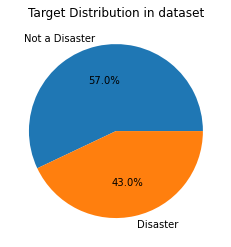

In [7]:
target_dict = {'Not a Disaster': 0, 'Disaster': 1}

target_distribution(df['target'], 'dataset')

__Use Random Under Sampler to handle the class imbalance:__
 - 1071 records with target label as '0' (Not a Disaster)' are dropped 

Target counts in dataset after Under Sampling set:
0:  3271
1:  3271


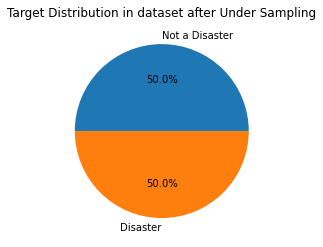

In [8]:
# Perform under sampling to match the target variable's number of 1's (Disaster) with 0's (Not a Disaster) on dataset 

from imblearn.under_sampling import RandomUnderSampler 

sampler = RandomUnderSampler(random_state = 32)
x_resampled_df, y_resampled = sampler.fit_sample(x_data, y_data)
x_resampled = x_resampled_df['input']   # its critical we pass X value as series and not a DF for Keras Tokenizer

target_distribution(y_resampled, 'dataset after Under Sampling')

__Set up the Training, Validation, Test data:__
 - We first split the input data into 2 parts (80% to be used for Train and Validation, 20% for for Testing)
 - From the 80% data, we further split into 10% as Validation data and remaining as Training data

Overall ratio: 72% (Train), 8% (Validation), 20% (Test)

x_train_val shape                 : (5233,)
x_train shape                     : (4709,)
x_val shape                       : (524,)
x_test shape                      : (1309,)
y_train_val shape & target counts : (5233,) (array([0, 1], dtype=int64), array([2617, 2616], dtype=int64))
y_train shape & target counts     : (4709,) (array([0, 1], dtype=int64), array([2355, 2354], dtype=int64))
y_val shape & target counts       : (524,) (array([0, 1], dtype=int64), array([262, 262], dtype=int64))
y_test shape & target counts      : (1309,) (array([0, 1], dtype=int64), array([654, 655], dtype=int64))

Target counts in Training + Validation dataset set:
0:  2617
1:  2616


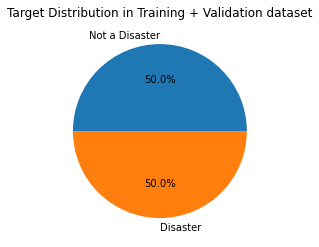

Target counts in Training dataset set:
0:  2355
1:  2354


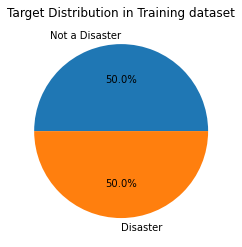

Target counts in Validation dataset set:
0:  262
1:  262


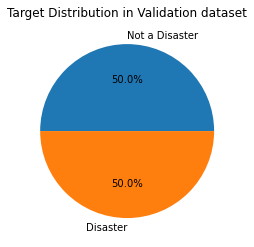

Target counts in Test dataset set:
0:  654
1:  655


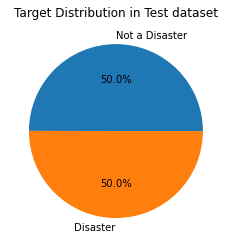

In [9]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = \
                    train_test_split(x_resampled, y_resampled, test_size = 0.20, stratify = y_resampled, random_state = 32)

x_train, x_val, y_train, y_val = \
                    train_test_split(x_train_val, y_train_val, test_size = 0.10, stratify = y_train_val, random_state = 32)

print('x_train_val shape                 :', x_train_val.shape)
print('x_train shape                     :', x_train.shape)
print('x_val shape                       :', x_val.shape)
print('x_test shape                      :', x_test.shape)
print('y_train_val shape & target counts : {} {}'.format(y_train_val.shape, np.unique(y_train_val, return_counts = True)))
print('y_train shape & target counts     : {} {}'.format(y_train.shape, np.unique(y_train, return_counts = True)))
print('y_val shape & target counts       : {} {}'.format(y_val.shape, np.unique(y_val, return_counts = True)))
print('y_test shape & target counts      : {} {}\n'.format(y_test.shape, np.unique(y_test, return_counts = True)))

target_distribution(y_train_val, 'Training + Validation dataset')
target_distribution(y_train, 'Training dataset')
target_distribution(y_val, 'Validation dataset')
target_distribution(y_test, 'Test dataset')

__Tokenize the words and chose the vocabulary size:__
 - We use the training and validation data for creating the word vocabulary by using Keras Tokenizer
   - Keras Tokenizer also takes care of preprocessing (like converting text to lower case, handling punctuations)
 - As the input records are low, we will use the entire unique vocabulary in the corpus without limiting it

In [10]:
import tensorflow
import tensorflow.keras as keras
from keras import preprocessing

# Below function will tokenize the corpus and create a word vocabulary 

def preprocess_tokenize(x_train_val, vocab_count):
    # Create a tokenizer -> configured to consider entire unique vocabulary
    tokenizer = preprocessing.text.Tokenizer()

    # Can be configured to only take into account the top-N most common words using below
    #tokenizer = preprocessing.text.Tokenizer(num_words = vocab_count)

    # Build the word index using training & validation data only 
    tokenizer.fit_on_texts(x_train_val)

    # Compute word index 
    word_index = tokenizer.word_index
    print('Found {} unique tokens in training data\n'.format(len(word_index)))

    # Currently set to utilize all unique words in input. Use the second option if restricting to limited words
    max_words = len(word_index) 
    #max_words = vocab_count - 1
    
    return (tokenizer, word_index, max_words)

__One hot encode the data:__
- One hot encode the input data corresponding to the size of input vocabulary 
- We will use Spare categorical entropy as the loss function. Hence we are not one hot encoding the target variable

In [11]:
# Function to one hot encode the input text with length equal to the word vocabulary 

def onehot_encode(x_train_val, x_train, x_val, x_test, tokenizer):    
    # Convert input words to one-hot binary representations based on word index created using training and validation data
    tokenizer = tokenizer
    x_train_val_one_hot = tokenizer.texts_to_matrix(x_train_val, mode='binary')
    x_train_one_hot = tokenizer.texts_to_matrix(x_train, mode='binary')
    x_val_one_hot = tokenizer.texts_to_matrix(x_val, mode='binary')
    x_test_one_hot = tokenizer.texts_to_matrix(x_test, mode='binary')

    print('x_train_one_hot shape :', x_train_one_hot.shape)
    print('x_val_one_hot shape   :', x_val_one_hot.shape)
    print('x_test_one_hot shape  :', x_test_one_hot.shape)
    print('y_train shape         :', y_train.shape)
    print('y_val shape           :', y_val.shape)
    print('y_test shape          :', y_test.shape)
    print('\n')
    
    return (x_train_val_one_hot, x_train_one_hot, x_val_one_hot, x_test_one_hot)

__Using simple Neural Network and one hot encoded inputs:__
 - Below function will define a simple Neural Network with 2 hidden layers
 - Relu is used for activation in dense layers and a softmax activation for the output nodes
 - Control overfitting by: 
   - Introducing drop out layer after the dense layer 
   - Using L1 and L2 regularization 
 - Sparse categorical cross entropy is the loss function as target variable is not one hot encoded
 - Accuracy is the metric that is being tracked 

In [12]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

# Below function will define the simple Neural Network that accepts necessary parameters that can be configured: 
    
def train_model(x_train, y_train, x_val, y_val, max_words, num_hidden_units_1, num_hidden_units_2, 
                epochs, batch_size, learning_rate):
    model_snn = models.Sequential()
    model_snn.add(layers.Dense(num_hidden_units_1, activation = 'relu', input_shape = ((max_words,)),
                           kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
    model_snn.add(layers.Dropout(0.5))
    model_snn.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                           kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
    model_snn.add(layers.Dropout(0.5))
    model_snn.add(layers.Dense(4, activation = 'softmax'))
    model_snn.summary()
    
    model_snn.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = optimizers.RMSprop(lr = learning_rate), 
                  metrics = ['accuracy'])
    
    history_snn = model_snn.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                validation_data = (x_val, y_val))
    return (history_snn, model_snn)

__Plot the Learning curves for Loss and Accuracy for Training and Validation:__

In [13]:
import matplotlib.pyplot as plt

def plot_learning(history): 
    # Plot the Loss curve 
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()   # clear figure

    # Plot the Accuracy curve 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

__Display the Confusion Matrix and Classification Report:__

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

def print_metrics(model, x_test, y_test, target_dict): 
    # model.predict will provide scores for all the classes for target variable (in this case, 4 scores for each record)
    y_test_pred_prob = model.predict(x_test)
    y_test_pred = np.zeros((len(y_test_pred_prob),))

    # Assign the class with highest probability as output label 
    for i in range(len(y_test_pred_prob)):
        y_test_pred[i] = np.argmax(y_test_pred_prob[i])  # pick the index of the class with highest probability value
    
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_test_pred, target_names = target_dict))

# 1) Simple Neural Network model
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Found 17582 unique tokens in training data

x_train_one_hot shape : (4709, 17583)
x_val_one_hot shape   : (524, 17583)
x_test_one_hot shape  : (1309, 17583)
y_train shape         : (4709,)
y_val shape           : (524,)
y_test shape          : (1309,)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1125376   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       


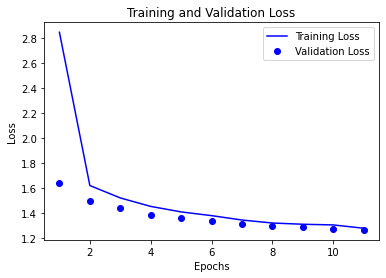

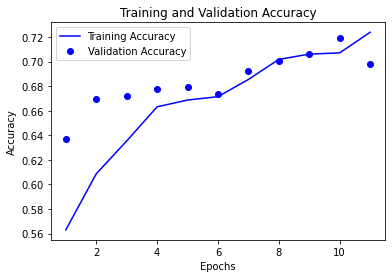

Training Loss & Accuracy: 
148/148 [==============================] - 1s 6ms/step - loss: 1.2195 - accuracy: 0.7715

Validation Loss & Accuracy: 
17/17 [==============================] - 0s 6ms/step - loss: 1.2633 - accuracy: 0.6985

Test Loss & Accuracy: 
41/41 [==============================] - 0s 5ms/step - loss: 1.2440 - accuracy: 0.7372

Confusion Matrix:
 [[481 173]
 [171 484]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.74      0.74      0.74       654
      Disaster       0.74      0.74      0.74       655

      accuracy                           0.74      1309
     macro avg       0.74      0.74      0.74      1309
  weighted avg       0.74      0.74      0.74      1309



In [15]:
# Tokenize and proeprocess the input

# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count value
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count = 10000)

# One hot encode the input
x_train_val_one_hot, x_train_one_hot, x_val_one_hot, x_test_one_hot = onehot_encode(x_train_val, x_train, 
                                                                                    x_val, x_test, tokenizer)

# Tune the hyper parameters -> hidden units in both layers, epochs, batch size, learning rate
# For updating the L1, L2 regulalizer or drop out values, update in the function where the model is defined

history_snn, model_snn = train_model(x_train_one_hot, y_train, x_val_one_hot, y_val, max_words = max_words + 1, 
                         num_hidden_units_1 = 64, num_hidden_units_2 = 32, 
                         epochs = 11, batch_size = 128, learning_rate = 0.001)

plot_learning(history_snn)

print('Training Loss & Accuracy: ') 
model_snn.evaluate(x_train_one_hot, y_train)

print('\nValidation Loss & Accuracy: ')
model_snn.evaluate(x_val_one_hot, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_snn.evaluate(x_test_one_hot, y_test)

print_metrics(model_snn, x_test_one_hot, y_test, target_dict)

 - Convert the input data into fixed length sequences instead of one hot encoding the values
 - Input length is configurable during model training
 - If input length is less than the chosen fixed length, then it will be padded with leading zeroes

In [16]:
# Convert input to sequence of fixed length tensor 

def inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer):
    # Convert strings into lists of integer indices sequences 
    x_train_seq = tokenizer.texts_to_sequences(x_train)
    x_val_seq = tokenizer.texts_to_sequences(x_val)
    x_test_seq = tokenizer.texts_to_sequences(x_test)

    # Convert lists of integers into a 2D integer tensor of shape `(samples, maxlen)`
    x_train_fixlen = preprocessing.sequence.pad_sequences(x_train_seq, maxlen = inp_max_len)
    x_val_fixlen = preprocessing.sequence.pad_sequences(x_val_seq, maxlen = inp_max_len)
    x_test_fixlen = preprocessing.sequence.pad_sequences(x_test_seq, maxlen = inp_max_len)
    
    print('x_train_fixlen shape :', x_train_fixlen.shape)
    print('x_val_fixlen shape   :', x_val_fixlen.shape)
    print('x_test_fixlen shape  :', x_test_fixlen.shape)
    print('y_train shape        :', y_train.shape)
    print('y_val shape          :', y_val.shape)
    print('y_test shape         :', y_test.shape)
    print('\n')
    
    return (x_train_fixlen, x_val_fixlen, x_test_fixlen)

__Using Word Embeddings (learnt from input corpus):__
 - Entire vocabulary of corpus is being used as number of input records are very low
 - Learn the word embeddings from the input data
 - Flatten the output of the embedding layer and feed into the classification model 
   - Use the same Neural Network which was defined previosuly, after the Embedding layer

In [17]:
# Create a NN model by learning word embeddings with the Embedding layer

def train_emb_model(x_train, y_train, x_val, y_val, emb_vec_len, inp_max_len, max_words, 
                    num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_emb = models.Sequential()
    model_emb.add(layers.Embedding(max_words, emb_vec_len, input_length = inp_max_len))
    model_emb.add(layers.Flatten())                          
    model_emb.add(layers.Dense(num_hidden_units_1, activation = 'relu',
                               kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
    model_emb.add(layers.Dropout(0.5))
    model_emb.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
    model_emb.add(layers.Dropout(0.5))
    model_emb.add(layers.Dense(4, activation = 'softmax'))

    model_emb.summary()

    model_emb.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = optimizers.RMSprop(lr = learning_rate), 
                  metrics = ['accuracy'])

    history_emb = model_emb.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                validation_data = (x_val, y_val))
    return (history_emb, model_emb)

# 2) Neural Network model using Embeddings learnt from input data
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Note: Update the embedding vector dimension, input length as required to improve model performance

Found 17582 unique tokens in training data

x_train_fixlen shape : (4709, 55)
x_val_fixlen shape   : (524, 55)
x_test_fixlen shape  : (1309, 55)
y_train shape        : (4709,)
y_val shape          : (524,)
y_test shape         : (1309,)


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 55, 100)           1758300   
_________________________________________________________________
flatten_7 (Flatten)          (None, 5500)              0         
_________________________________________________________________
dense_63 (Dense)             (None, 64)                352064    
_________________________________________________________________
dropout_42 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 32)                2080      
____________

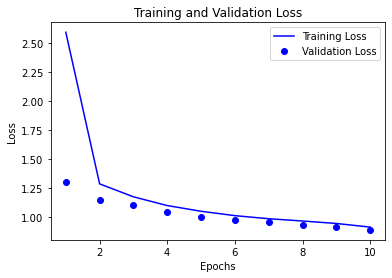

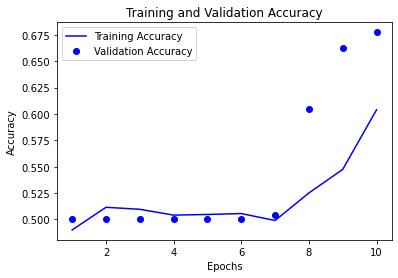

Training Loss & Accuracy: 
148/148 [==============================] - 0s 3ms/step - loss: 0.8581 - accuracy: 0.7564

Validation Loss & Accuracy: 
17/17 [==============================] - 0s 3ms/step - loss: 0.8856 - accuracy: 0.6775

Test Loss & Accuracy: 
41/41 [==============================] - 0s 3ms/step - loss: 0.8795 - accuracy: 0.7135

Confusion Matrix:
 [[557  97]
 [278 377]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.67      0.85      0.75       654
      Disaster       0.80      0.58      0.67       655

      accuracy                           0.71      1309
     macro avg       0.73      0.71      0.71      1309
  weighted avg       0.73      0.71      0.71      1309



In [51]:
# Update emb_vec_len, inp_max_len parameters as required: 

emb_vec_len = 100
inp_max_len = 55     # only these many number of words from the start of input text will be considered
vocab_count = 10000

# Tokenize and proeprocess the input
# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count value
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count)

x_train_fixlen, x_val_fixlen, x_test_fixlen = inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer)

history_emb, model_emb = train_emb_model(x_train_fixlen, y_train, x_val_fixlen, y_val, emb_vec_len, inp_max_len, 
                                         max_words = max_words + 1, num_hidden_units_1 = 64, num_hidden_units_2 = 32, 
                                         epochs = 10, batch_size = 128, learning_rate = 0.001)

plot_learning(history_emb)

print('Training Loss & Accuracy: ') 
model_emb.evaluate(x_train_fixlen, y_train)

print('\nValidation Loss & Accuracy: ')
model_emb.evaluate(x_val_fixlen, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_emb.evaluate(x_test_fixlen, y_test)

print_metrics(model_emb, x_test_fixlen, y_test, target_dict)

__Pretrained GloVe model:__
 - Download GloVe embedding (we will use 100 dimension file) and build the embedding index 
 - Create embedding matrix for the words from vocabulary (built from input corpus)
   - The pretrained weights from the GloVe model will be used as weights in our model's embedding layer

In [19]:
# Build the embedding index and embedding matrix (weight matrix) from the pretrained GloVe 100d model 

os.chdir(r'C:\MSBA\Fall 2020\INSY 5376 - Big Data\Assignments\glove.6B')

def build_embindex_embmatrix(emb_vec_len, word_index, max_words):
    embeddings_index = {}

    with open('glove.6B.100d.txt', encoding = 'utf-8') as infile:    
        for line in infile: 
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1 : emb_vec_len + 1], dtype='float32')
            embeddings_index[word] = coefs

    print('Found %s word vectors' % len(embeddings_index))

    embedding_matrix = np.zeros((max_words, emb_vec_len))

    for word, i in word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                # Words not found in embedding index will be all-zeros.
                embedding_matrix[i] = embedding_vector

    print('Embedding matrix shape: ', embedding_matrix.shape)
    return (embedding_matrix)

__Using Word Embeddings from pretrained GloVe model:__
 - Entire vocabulary of corpus is being used as number of input records are very low
 - Use the word embeddings from the GloVe 100d model (customize the size of embedding as required for our model)
 - Flatten the output of the embedding layer and feed into the classification model 
   - Use the same Neural Network which was defined previosuly, after the Embedding layer

Note: Embedding matrix from the GloVe model are used to set the weights of the embedding layer and the layer is freezed so 
      during training, the pretrained weights remain constant and the learning is not lost

In [20]:
# Create a NN model by using pretrained GloVe word embeddings with the Embedding layer

def train_pt_emb_model(x_train, y_train, x_val, y_val, emb_vec_len, inp_max_len, embedding_matrix, max_words, 
                       num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_pt_emb = models.Sequential()
    model_pt_emb.add(layers.Embedding(max_words, emb_vec_len, input_length = inp_max_len))
    model_pt_emb.add(layers.Flatten())                          
    model_pt_emb.add(layers.Dense(num_hidden_units_1, activation = 'relu',
                               kernel_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001)))
    model_pt_emb.add(layers.Dropout(0.5))
    model_pt_emb.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001)))
    model_pt_emb.add(layers.Dropout(0.5))
    model_pt_emb.add(layers.Dense(4, activation = 'softmax'))

    model_pt_emb.summary()

    # Load the GloVe embeddings and freeze the embedding layer so that pre trained weights are used
    model_pt_emb.layers[0].set_weights([embedding_matrix])
    model_pt_emb.layers[0].trainable = False
    
    model_pt_emb.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = optimizers.RMSprop(lr = learning_rate), 
                  metrics = ['accuracy'])

    history_pt_emb = model_pt_emb.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                      validation_data = (x_val, y_val))
    return (history_pt_emb, model_pt_emb)

# 3) Neural Network model using pre trained GloVe Embeddings
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Note: Update the embedding vector dimension, input length as required to improve model performance

Found 17582 unique tokens in training data

x_train_fixlen shape : (4709, 55)
x_val_fixlen shape   : (524, 55)
x_test_fixlen shape  : (1309, 55)
y_train shape        : (4709,)
y_val shape          : (524,)
y_test shape         : (1309,)


Found 400000 word vectors
Embedding matrix shape:  (17583, 100)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 55, 100)           1758300   
_________________________________________________________________
flatten_1 (Flatten)          (None, 5500)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                352064    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)

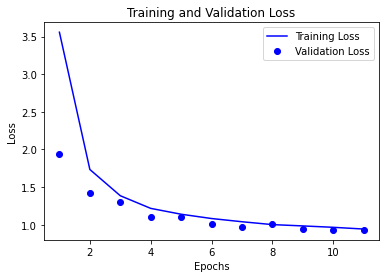

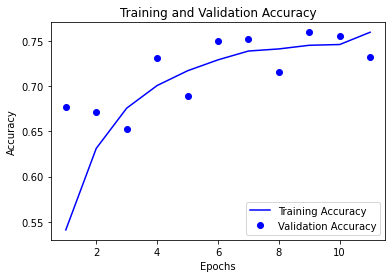

Training Loss & Accuracy: 
148/148 [==============================] - 0s 3ms/step - loss: 0.8540 - accuracy: 0.8082

Validation Loss & Accuracy: 
17/17 [==============================] - 0s 3ms/step - loss: 0.9357 - accuracy: 0.7328

Test Loss & Accuracy: 
41/41 [==============================] - 0s 2ms/step - loss: 0.9299 - accuracy: 0.7517

Confusion Matrix:
 [[563  91]
 [234 421]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.71      0.86      0.78       654
      Disaster       0.82      0.64      0.72       655

      accuracy                           0.75      1309
     macro avg       0.76      0.75      0.75      1309
  weighted avg       0.76      0.75      0.75      1309



In [21]:
# Update below parameters as required
inp_max_len = 55      # only these many number of words from the start of input text will be considered  
vocab_count = 10000    # currently this field is not being used to choose vocabulary size
emb_vec_len = 100       # cannot exceed 100 as glove.6B.100d is being used

# Tokenize and proeprocess the input
# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count to desired value 
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count)

# Convert the input to fixed length sequences 
x_train_fixlen, x_val_fixlen, x_test_fixlen = inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer)

# Build the embedding index and embedding matrix (weight matrix) from the pretrained GloVe 100d model 
embedding_matrix = build_embindex_embmatrix(emb_vec_len, word_index, max_words = max_words + 1)

# Define and train the model 
history_pt_emb, model_pt_emb = train_pt_emb_model(x_train_fixlen, y_train, x_val_fixlen, y_val,
                                                  emb_vec_len, inp_max_len, embedding_matrix, max_words = max_words + 1, 
                                                  num_hidden_units_1 = 64, num_hidden_units_2 = 32,  
                                                  epochs = 11, batch_size = 128, learning_rate = 0.001)
# plot the learning curves
plot_learning(history_pt_emb)

print('Training Loss & Accuracy: ') 
model_pt_emb.evaluate(x_train_fixlen, y_train)

print('\nValidation Loss & Accuracy: ')
model_pt_emb.evaluate(x_val_fixlen, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_pt_emb.evaluate(x_test_fixlen, y_test)

# Display the test metrics -> Confusion matrix & Classification report
print_metrics(model_pt_emb, x_test_fixlen, y_test, target_dict)

__Define a simple Recurrent Neural Network (stacked RNN in below case) using embeddings learnt from input data:__
   - We will learn the word embeddings from input corpus, instead of using a pretrained model (like GloVe)
   - The output of the embedding layer is not flattened. It is fed as-is (3-dimesional tensor) to RNN layer
     - i.e. data is processed as it is: a sequence, where order of the words will also be considered
   - RNN layers are followed by previously defined simple NN classfication model
   - Note the usage of drop out and recurrent drop out parameters within the RNN layers
     - dropout: specifying the dropout rate for input units of the layer
     - recurrent_dropout: specifying the dropout rate of the recurrent units

In [22]:
# Create a NN model by learning word embeddings with the Embedding layer and using Simple RNN

def train_rnn_model(x_train, y_train, x_val, y_val, emb_vec_len, inp_max_len, max_words, rnn_nodes, 
                    num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_rnn = models.Sequential()
    model_rnn.add(layers.Embedding(max_words, emb_vec_len, input_length = inp_max_len))
    model_rnn.add(layers.SimpleRNN(rnn_nodes, dropout = 0.3, recurrent_dropout = 0.3, return_sequences=True))
    model_rnn.add(layers.SimpleRNN(rnn_nodes, dropout = 0.3, recurrent_dropout = 0.3))
    model_rnn.add(layers.Dense(num_hidden_units_1, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
    model_rnn.add(layers.Dropout(0.5))
    model_rnn.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)))
    model_rnn.add(layers.Dropout(0.5))
    model_rnn.add(layers.Dense(4, activation = 'softmax'))

    model_rnn.summary()

    model_rnn.compile(loss = 'sparse_categorical_crossentropy', 
                  optimizer = optimizers.RMSprop(lr = learning_rate), 
                  metrics = ['accuracy'])

    history_rnn = model_rnn.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                validation_data = (x_val, y_val))
    return (history_rnn, model_rnn)

# 4) Recurrent Neural Network (RNN) model:
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Note: Update the embedding vector dimension, input length as required to improve model performance

Found 17582 unique tokens in training data

x_train_fixlen shape : (4709, 55)
x_val_fixlen shape   : (524, 55)
x_test_fixlen shape  : (1309, 55)
y_train shape        : (4709,)
y_val shape          : (524,)
y_test shape         : (1309,)


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 55, 64)            1125312   
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 55, 64)            8256      
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 64)                8256      
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
____________

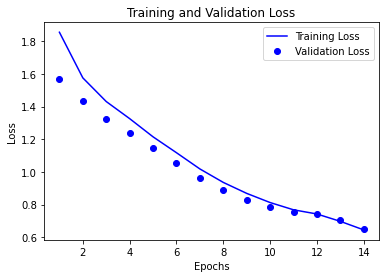

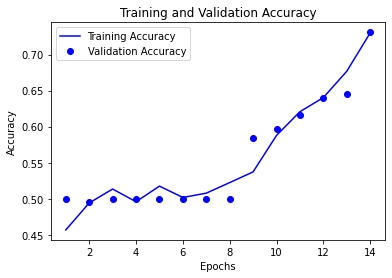

Training Loss & Accuracy: 
148/148 [==============================] - 1s 6ms/step - loss: 0.5408 - accuracy: 0.8046

Validation Loss & Accuracy: 
17/17 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.7309

Test Loss & Accuracy: 
41/41 [==============================] - 0s 6ms/step - loss: 0.6583 - accuracy: 0.7219

Confusion Matrix:
 [[625  29]
 [335 320]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.65      0.96      0.77       654
      Disaster       0.92      0.49      0.64       655

      accuracy                           0.72      1309
     macro avg       0.78      0.72      0.71      1309
  weighted avg       0.78      0.72      0.71      1309



In [43]:
# Update emb_vec_len, inp_max_len parameters as required: 

emb_vec_len = 64
inp_max_len = 55
vocab_count = 10000

# Tokenize and proeprocess the input
# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count value
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count)

x_train_fixlen, x_val_fixlen, x_test_fixlen = inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer)

history_rnn, model_rnn = train_rnn_model(x_train_fixlen, y_train, x_val_fixlen, y_val, emb_vec_len, inp_max_len, 
                                         max_words = max_words + 1, rnn_nodes = 64, num_hidden_units_1 = 64, 
                                         num_hidden_units_2 = 32, epochs = 14, batch_size = 128, learning_rate = 0.001)

plot_learning(history_rnn)

print('Training Loss & Accuracy: ') 
model_rnn.evaluate(x_train_fixlen, y_train)

print('\nValidation Loss & Accuracy: ')
model_rnn.evaluate(x_val_fixlen, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_rnn.evaluate(x_test_fixlen, y_test)

print_metrics(model_rnn, x_test_fixlen, y_test, target_dict)

__Define a Long Short Term Memory model (stacked LSTM in below case) using embeddings learnt from input data:__
   - We will learn the word embeddings from input corpus, instead of using a pretrained model (like GloVe)
   - The output of the embedding layer is not flattened. It is fed as-is (3-dimesional tensor) to LSTM layer
     - i.e. data is processed as it is: a sequence, where order of the words will also be considered
   - LSTM layers are followed by previously defined simple NN classfication model
   - Note the usage of drop out and recurrent drop out parameters within the LSTM layers
     - dropout: specifying the dropout rate for input units of the layer
     - recurrent_dropout: specifying the dropout rate of the recurrent units

In [24]:
# Create a NN model by learning word embeddings with the Embedding layer and using LSTM

def train_lstm_model(x_train, y_train, x_val, y_val, emb_vec_len, inp_max_len, max_words, lstm_nodes, 
                    num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_lstm = models.Sequential()
    model_lstm.add(layers.Embedding(max_words, emb_vec_len, input_length = inp_max_len))
    model_lstm.add(layers.LSTM(lstm_nodes, dropout = 0.35, recurrent_dropout = 0.35, return_sequences=True))
    model_lstm.add(layers.LSTM(lstm_nodes, dropout = 0.35, recurrent_dropout = 0.35))
    model_lstm.add(layers.Dense(num_hidden_units_1, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_lstm.add(layers.Dropout(0.5))
    model_lstm.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                               kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_lstm.add(layers.Dropout(0.5))
    model_lstm.add(layers.Dense(4, activation = 'softmax'))

    model_lstm.summary()

    model_lstm.compile(loss = 'sparse_categorical_crossentropy', 
                       optimizer = optimizers.RMSprop(lr = learning_rate), 
                       metrics = ['accuracy'])

    history_lstm = model_lstm.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                  validation_data = (x_val, y_val))
    return (history_lstm, model_lstm)

# 5) Long Short Term Memory model (LSTM):
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Note: Update the embedding vector dimension, input length as required to improve model performance

Found 17582 unique tokens in training data

x_train_fixlen shape : (4709, 55)
x_val_fixlen shape   : (524, 55)
x_test_fixlen shape  : (1309, 55)
y_train shape        : (4709,)
y_val shape          : (524,)
y_test shape         : (1309,)


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 55, 64)            1125312   
_________________________________________________________________
lstm_4 (LSTM)                (None, 55, 64)            33024     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
____________

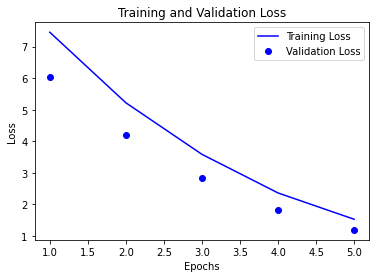

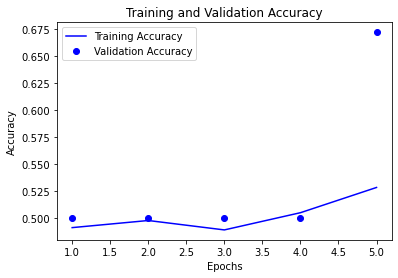

Training Loss & Accuracy: 
148/148 [==============================] - 2s 14ms/step - loss: 1.1767 - accuracy: 0.7481

Validation Loss & Accuracy: 
17/17 [==============================] - 0s 12ms/step - loss: 1.1849 - accuracy: 0.6718

Test Loss & Accuracy: 
41/41 [==============================] - 1s 15ms/step - loss: 1.1790 - accuracy: 0.7273

Confusion Matrix:
 [[471 183]
 [174 481]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.73      0.72      0.73       654
      Disaster       0.72      0.73      0.73       655

      accuracy                           0.73      1309
     macro avg       0.73      0.73      0.73      1309
  weighted avg       0.73      0.73      0.73      1309



In [44]:
# Update emb_vec_len, inp_max_len parameters as required: 

emb_vec_len = 64
inp_max_len = 55
vocab_count = 10000

# Tokenize and proeprocess the input
# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count value
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count)

x_train_fixlen, x_val_fixlen, x_test_fixlen = inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer)

history_lstm, model_lstm = train_lstm_model(x_train_fixlen, y_train, x_val_fixlen, y_val, emb_vec_len, inp_max_len, 
                                            max_words = max_words + 1, lstm_nodes = 64, num_hidden_units_1 = 64, 
                                            num_hidden_units_2 = 32, epochs = 5, batch_size = 128, learning_rate = 0.001)

plot_learning(history_lstm)

print('Training Loss & Accuracy: ') 
model_lstm.evaluate(x_train_fixlen, y_train)

print('\nValidation Loss & Accuracy: ')
model_lstm.evaluate(x_val_fixlen, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_lstm.evaluate(x_test_fixlen, y_test)

print_metrics(model_lstm, x_test_fixlen, y_test, target_dict)

__Define a Bi-directional Long Short Term Memory (stacked Bi-dir LSTM in below case) using embeddings learnt from input data:__
   - We will learn the word embeddings from input corpus, instead of using a pretrained model (like GloVe)
   - The output of the embedding layer is not flattened. It is fed as-is (3-dimesional tensor) to Bi-dir LSTM layer
     - i.e. data is processed as it is: a sequence, where order of the words will also be considered
   - Bi-dir LSTM layers are followed by previously defined simple NN classfication model
   - Note the usage of drop out and recurrent drop out parameters within the Bi-dir LSTM layers
     - dropout: specifying the dropout rate for input units of the layer
     - recurrent_dropout: specifying the dropout rate of the recurrent units

In [26]:
# Create a NN model by learning word embeddings with the Embedding layer and using Bi-directional LSTM

def train_bidir_lstm_model(x_train, y_train, x_val, y_val, emb_vec_len, inp_max_len, max_words, bidir_lstm_nodes, 
                           num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_bidir_lstm = models.Sequential()
    model_bidir_lstm.add(layers.Embedding(max_words, emb_vec_len, input_length = inp_max_len))
    model_bidir_lstm.add(layers.Bidirectional(layers.LSTM(bidir_lstm_nodes, dropout = 0.2, recurrent_dropout = 0.2, 
                                                          return_sequences=True)))
    model_bidir_lstm.add(layers.Bidirectional(layers.LSTM(bidir_lstm_nodes, dropout = 0.2, recurrent_dropout = 0.2)))
    model_bidir_lstm.add(layers.Dense(num_hidden_units_1, activation = 'relu', 
                                      kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_bidir_lstm.add(layers.Dropout(0.5))
    model_bidir_lstm.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                                      kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_bidir_lstm.add(layers.Dropout(0.5))
    model_bidir_lstm.add(layers.Dense(4, activation = 'softmax'))

    model_bidir_lstm.summary()

    model_bidir_lstm.compile(loss = 'sparse_categorical_crossentropy', 
                             optimizer = optimizers.RMSprop(lr = learning_rate), 
                             metrics = ['accuracy'])

    history_bidir_lstm = model_bidir_lstm.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                              validation_data = (x_val, y_val))
    return (history_bidir_lstm, model_bidir_lstm)

# 6) Bi-directional Long Short Term Memory model (Bi-dir LSTM):
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Note: Update the embedding vector dimension, input length as required to improve model performance

Found 17582 unique tokens in training data

x_train_fixlen shape : (4709, 55)
x_val_fixlen shape   : (524, 55)
x_test_fixlen shape  : (1309, 55)
y_train shape        : (4709,)
y_val shape          : (524,)
y_test shape         : (1309,)


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 55, 64)            1125312   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 55, 128)           66048     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
____________

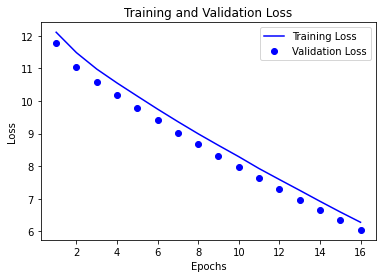

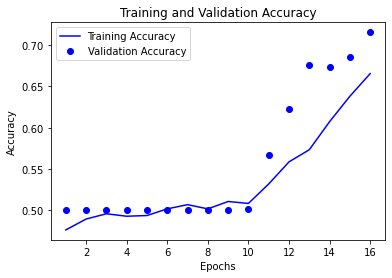

Training Loss & Accuracy: 
148/148 [==============================] - 4s 26ms/step - loss: 5.9922 - accuracy: 0.7632

Validation Loss & Accuracy: 
17/17 [==============================] - 0s 23ms/step - loss: 6.0441 - accuracy: 0.7156

Test Loss & Accuracy: 
41/41 [==============================] - 1s 25ms/step - loss: 6.0515 - accuracy: 0.7021

Confusion Matrix:
 [[619  35]
 [355 300]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.64      0.95      0.76       654
      Disaster       0.90      0.46      0.61       655

      accuracy                           0.70      1309
     macro avg       0.77      0.70      0.68      1309
  weighted avg       0.77      0.70      0.68      1309



In [45]:
# Update emb_vec_len, inp_max_len parameters as required: 

emb_vec_len = 64
inp_max_len = 55
vocab_count = 10000

# Tokenize and proeprocess the input
# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count value
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count)

x_train_fixlen, x_val_fixlen, x_test_fixlen = inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer)

history_bidir_lstm, model_bidir_lstm = train_bidir_lstm_model(x_train_fixlen, y_train, x_val_fixlen, y_val, emb_vec_len, 
                                                              inp_max_len, max_words = max_words + 1, bidir_lstm_nodes = 64,
                                                              num_hidden_units_1 = 64, num_hidden_units_2 = 32, 
                                                              epochs = 16, batch_size = 128, learning_rate = 0.0001)

plot_learning(history_bidir_lstm)

print('Training Loss & Accuracy: ') 
model_bidir_lstm.evaluate(x_train_fixlen, y_train)

print('\nValidation Loss & Accuracy: ')
model_bidir_lstm.evaluate(x_val_fixlen, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_bidir_lstm.evaluate(x_test_fixlen, y_test)

print_metrics(model_bidir_lstm, x_test_fixlen, y_test, target_dict)

__Define a Convolutional Neural Network (stacked CNN in below case) using embeddings learnt from input data:__
   - We will learn the word embeddings from input corpus, instead of using a pretrained model (like GloVe)
   - The output of the embedding layer is not flattened. It is fed as-is (3-dimesional tensor) to Convnet layer
   - Convnet layers are followed by previously defined simple NN classfication model

In [28]:
# Create a NN model by learning word embeddings with the Embedding layer and using convnets

def train_cnn_model(x_train, y_train, x_val, y_val, emb_vec_len, inp_max_len, max_words, cnn_nodes_1, cnn_nodes_2, 
                    num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_cnn = models.Sequential()
    model_cnn.add(layers.Embedding(max_words, emb_vec_len, input_length = inp_max_len))  
    model_cnn.add(layers.Conv1D(cnn_nodes_1, 7, activation = 'relu'))
    model_cnn.add(layers.MaxPooling1D(5))
    model_cnn.add(layers.Conv1D(cnn_nodes_2, 7, activation = 'relu'))
    model_cnn.add(layers.GlobalMaxPooling1D())
    model_cnn.add(layers.Dense(num_hidden_units_1, activation = 'relu', 
                                      kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_cnn.add(layers.Dropout(0.5))
    model_cnn.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                                      kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)))
    model_cnn.add(layers.Dropout(0.5))
    model_cnn.add(layers.Dense(4, activation = 'softmax'))

    model_cnn.summary()

    model_cnn.compile(loss = 'sparse_categorical_crossentropy', 
                             optimizer = optimizers.RMSprop(lr = learning_rate), 
                             metrics = ['accuracy'])

    history_cnn = model_cnn.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                              validation_data = (x_val, y_val))
    return (history_cnn, model_cnn)

# 7) Convolutional Neural Network (CNN) model:
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Note: Update the embedding vector dimension, input length as required to improve model performance

Found 17582 unique tokens in training data

x_train_fixlen shape : (4709, 55)
x_val_fixlen shape   : (524, 55)
x_test_fixlen shape  : (1309, 55)
y_train shape        : (4709,)
y_val shape          : (524,)
y_test shape         : (1309,)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 55, 64)            1125312   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 49, 32)            14368     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 32)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 64)             14400     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_____________

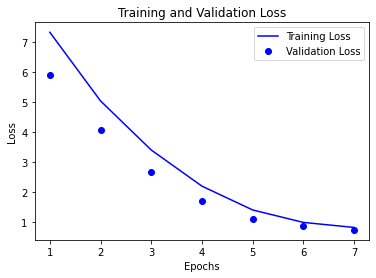

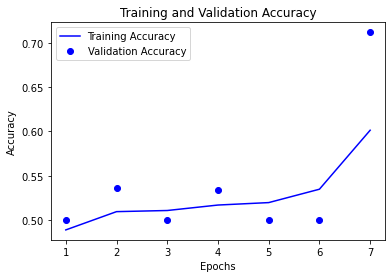

Training Loss & Accuracy: 
148/148 [==============================] - 0s 2ms/step - loss: 0.7127 - accuracy: 0.8065

Validation Loss & Accuracy: 
17/17 [==============================] - 0s 2ms/step - loss: 0.7469 - accuracy: 0.7118

Test Loss & Accuracy: 
41/41 [==============================] - 0s 2ms/step - loss: 0.7434 - accuracy: 0.7334

Confusion Matrix:
 [[557  97]
 [252 403]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.69      0.85      0.76       654
      Disaster       0.81      0.62      0.70       655

      accuracy                           0.73      1309
     macro avg       0.75      0.73      0.73      1309
  weighted avg       0.75      0.73      0.73      1309



In [37]:
# Update emb_vec_len, inp_max_len parameters as required: 

emb_vec_len = 64
inp_max_len = 55
vocab_count = 10000

# Tokenize and proeprocess the input
# Note -> currently the function is not using vocab_count to control the number of words. All words in corpus is being used
# To change this modify code in preprocess_tokenize function and update vocab_count value
tokenizer, word_index, max_words = preprocess_tokenize(x_train_val, vocab_count)

x_train_fixlen, x_val_fixlen, x_test_fixlen = inp_fixlen(x_train, x_val, x_test, inp_max_len, tokenizer)

history_cnn, model_cnn = train_cnn_model(x_train_fixlen, y_train, x_val_fixlen, y_val, emb_vec_len, 
                                                              inp_max_len, max_words = max_words + 1, 
                                                              cnn_nodes_1 = 32, cnn_nodes_2 = 64,
                                                              num_hidden_units_1 = 64, num_hidden_units_2 = 32, 
                                                              epochs = 7, batch_size = 128, learning_rate = 0.001)

plot_learning(history_cnn)

print('Training Loss & Accuracy: ') 
model_cnn.evaluate(x_train_fixlen, y_train)

print('\nValidation Loss & Accuracy: ')
model_cnn.evaluate(x_val_fixlen, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_cnn.evaluate(x_test_fixlen, y_test)

print_metrics(model_cnn, x_test_fixlen, y_test, target_dict)

__Build traditional Machine Learning models:__
 - Train the model 
 - Determine Training and Test Accuracy 
 - Predict on Test data and display the Confusion Matrix and Classification Report

In [30]:
def build_ml_model(x_train, y_train, x_test, y_test, target_dict, model):
    model.fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)

    print('Train Accuracy : %.4f' % train_acc)
    print('Test Accuracy  : %.4f' % test_acc)

    y_test_pred = model.predict(x_test)

    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_test_pred, target_names = target_dict))
    
    return (model)

# 8) Logistic Regression model (using Cross Validation): 
 - Tune the hyper parameters as required to improve model performance
     - C parameter -> Inverse of regularization strength, smaller values specify stronger regularization

In [31]:
from sklearn.linear_model import LogisticRegressionCV

model_lr = LogisticRegressionCV(cv = 5, max_iter = 1000, random_state = 32, n_jobs = -1, Cs = [0.01])
                                #Cs = np.logspace(-10, -1, 10)) 
model_lr = build_ml_model(x_train_val_one_hot, y_train_val, x_test_one_hot, y_test, target_dict, model_lr)

Train Accuracy : 0.7363
Test Accuracy  : 0.7097

Confusion Matrix:
 [[474 180]
 [200 455]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.70      0.72      0.71       654
      Disaster       0.72      0.69      0.71       655

      accuracy                           0.71      1309
     macro avg       0.71      0.71      0.71      1309
  weighted avg       0.71      0.71      0.71      1309



# 9) Multinomial Naive Bayes: 
 - Tune the hyper parameters as required to improve model performance
     - Alpha hyper parameter is the smoothing parameter which helps:  
       - with unseen words in test data so that entire probability doesnt become zero
       - with words that occur more / less frequently in training and test data, by moving likelihood probabilities to uniform          distribution

In [32]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB(alpha = 78)
model_nb = build_ml_model(x_train_val_one_hot, y_train_val, x_test_one_hot, y_test, target_dict, model_nb)

Train Accuracy : 0.7193
Test Accuracy  : 0.7013

Confusion Matrix:
 [[391 263]
 [128 527]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.75      0.60      0.67       654
      Disaster       0.67      0.80      0.73       655

      accuracy                           0.70      1309
     macro avg       0.71      0.70      0.70      1309
  weighted avg       0.71      0.70      0.70      1309



# 10) Linear Support Vector Classifier model (Linear SVC): 
 - Tune the hyper parameters as required to improve model performance
   - C parameter -> Inverse of regularization strength, smaller values specify stronger regularization

In [33]:
from sklearn.svm import LinearSVC

model_lsvc = LinearSVC(max_iter = 10000, class_weight = 'balanced', C = 0.001)
model_lsvc = build_ml_model(x_train_val_one_hot, y_train_val, x_test_one_hot, y_test, target_dict, model_lsvc)

Train Accuracy : 0.7267
Test Accuracy  : 0.7089

Confusion Matrix:
 [[462 192]
 [189 466]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.71      0.71      0.71       654
      Disaster       0.71      0.71      0.71       655

      accuracy                           0.71      1309
     macro avg       0.71      0.71      0.71      1309
  weighted avg       0.71      0.71      0.71      1309



# 11) Random Forest Classifier: 
 - Tune the hyper parameters as required to improve model performance

In [34]:
from sklearn.ensemble import RandomForestClassifier

#maximum_features = max_words
maximum_features = 55

model_rf = RandomForestClassifier(n_jobs = -1, random_state = 32, oob_score = 'True', criterion = 'gini', 
                                  n_estimators = 75, max_depth = 3, max_features = maximum_features)
                                  
model_rf = build_ml_model(x_train_val_one_hot, y_train_val, x_test_one_hot, y_test, target_dict, model_rf)

Train Accuracy : 0.7330
Test Accuracy  : 0.7189

Confusion Matrix:
 [[511 143]
 [225 430]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.69      0.78      0.74       654
      Disaster       0.75      0.66      0.70       655

      accuracy                           0.72      1309
     macro avg       0.72      0.72      0.72      1309
  weighted avg       0.72      0.72      0.72      1309



# 12) XG Boost Classifier: 
 - Tune the hyper parameters as required to improve model performance
   - learning_rate: After each boosting step, gets the weights of new features and shrinks the feature weights to make the          boosting process more conservative, thus controlling overfitting

In [35]:
from xgboost import XGBClassifier

model_xgbc = XGBClassifier(n_jobs = -1, random_state = 32, verbosity = 0, 
                           n_estimators = 75, max_depth = 4, learning_rate = 0.1)
                                  
model_xgbc = build_ml_model(x_train_val_one_hot, y_train_val, x_test_one_hot, y_test, target_dict, model_xgbc)

Train Accuracy : 0.7401
Test Accuracy  : 0.7296

Confusion Matrix:
 [[483 171]
 [183 472]]

Classification Report:
                  precision    recall  f1-score   support

Not a Disaster       0.73      0.74      0.73       654
      Disaster       0.73      0.72      0.73       655

      accuracy                           0.73      1309
     macro avg       0.73      0.73      0.73      1309
  weighted avg       0.73      0.73      0.73      1309



# Summary of Model peformance:
 - Score all the models for Training, Validation and Test data
 - Load the results into a Dataframe and display the results sorted by Test accuracy 

In [52]:
model_dl = {'embedding': model_emb, 
            'Pre-trained embedding': model_pt_emb, 
            'RNN': model_rnn, 
            'LSTM': model_lstm, 
            'Bi-directional LSTM': model_bidir_lstm,
            'CNN': model_cnn}

model_ml = {'Logistic Regression': model_lr, 
            'Multinomial NB': model_nb, 
            'Linear SVC': model_lsvc, 
            'Random Forest Classifier': model_rf, 
            'XGBoost Classifier': model_xgbc}

def dl_models(x, y, model): 
    loss, accuracy = model.evaluate(x, y)
    return (accuracy)

def ml_models(x, y, model): 
    accuracy = model.score(x, y)
    return (accuracy)

results = []

# Simple NN alone is kept outside the loop, as it uses one hot encoded inputs (rather than fixed length sequences)
accuracy_train = dl_models(x_train_one_hot, y_train, model_snn)
accuracy_val = dl_models(x_val_one_hot, y_val, model_snn)
accuracy_test = dl_models(x_test_one_hot, y_test, model_snn) 
results.append(['Simple NN', accuracy_train, accuracy_val, accuracy_test])

for model_name, model in model_dl.items():
    accuracy_train = dl_models(x_train_fixlen, y_train, model)
    accuracy_val = dl_models(x_val_fixlen, y_val, model)
    accuracy_test = dl_models(x_test_fixlen, y_test, model) 
    results.append([model_name, accuracy_train, accuracy_val, accuracy_test])
    
for model_name, model in model_ml.items():
    accuracy_train = ml_models(x_train_one_hot, y_train, model)
    accuracy_val = ml_models(x_val_one_hot, y_val, model)
    accuracy_test = ml_models(x_test_one_hot, y_test, model) 
    results.append([model_name, accuracy_train, accuracy_val, accuracy_test])

column = ['Model name', 'Training Acc', 'Val Acc', 'Test Acc']

df_results = pd.DataFrame(results, columns = column)
df_results.sort_values(by = ['Test Acc'], ascending = False, inplace = True)
df_results.reset_index(drop = True, inplace = True)
df_results.round(4)

41/41 [==============================] - 0s 2ms/step - loss: 0.7434 - accuracy: 0.7334


,Model name,Training Acc,Val Acc,Test Acc
0,Pre-trained embedding,0.8082,0.7328,0.7517
1,Simple NN,0.7715,0.6985,0.7372
2,CNN,0.8065,0.7118,0.7334
3,XGBoost Classifier,0.7430,0.7137,0.7296
4,LSTM,0.7481,0.6718,0.7273
5,RNN,0.8046,0.7309,0.7219
6,Random Forest Classifier,0.7375,0.6927,0.7189
7,embedding,0.7564,0.6775,0.7135
8,Logistic Regression,0.7394,0.7080,0.7097
9,Linear SVC,0.7301,0.6966,0.7089


__Inferences__: 
 - Overall accuracies of all the models are ranging between 70% to 75%
 - Deep Learning models not performing as expected, due to low volume of input records
 - Varying accuracies noted from run to run with same parameters for the DL NN models, which is a concern to be addressed